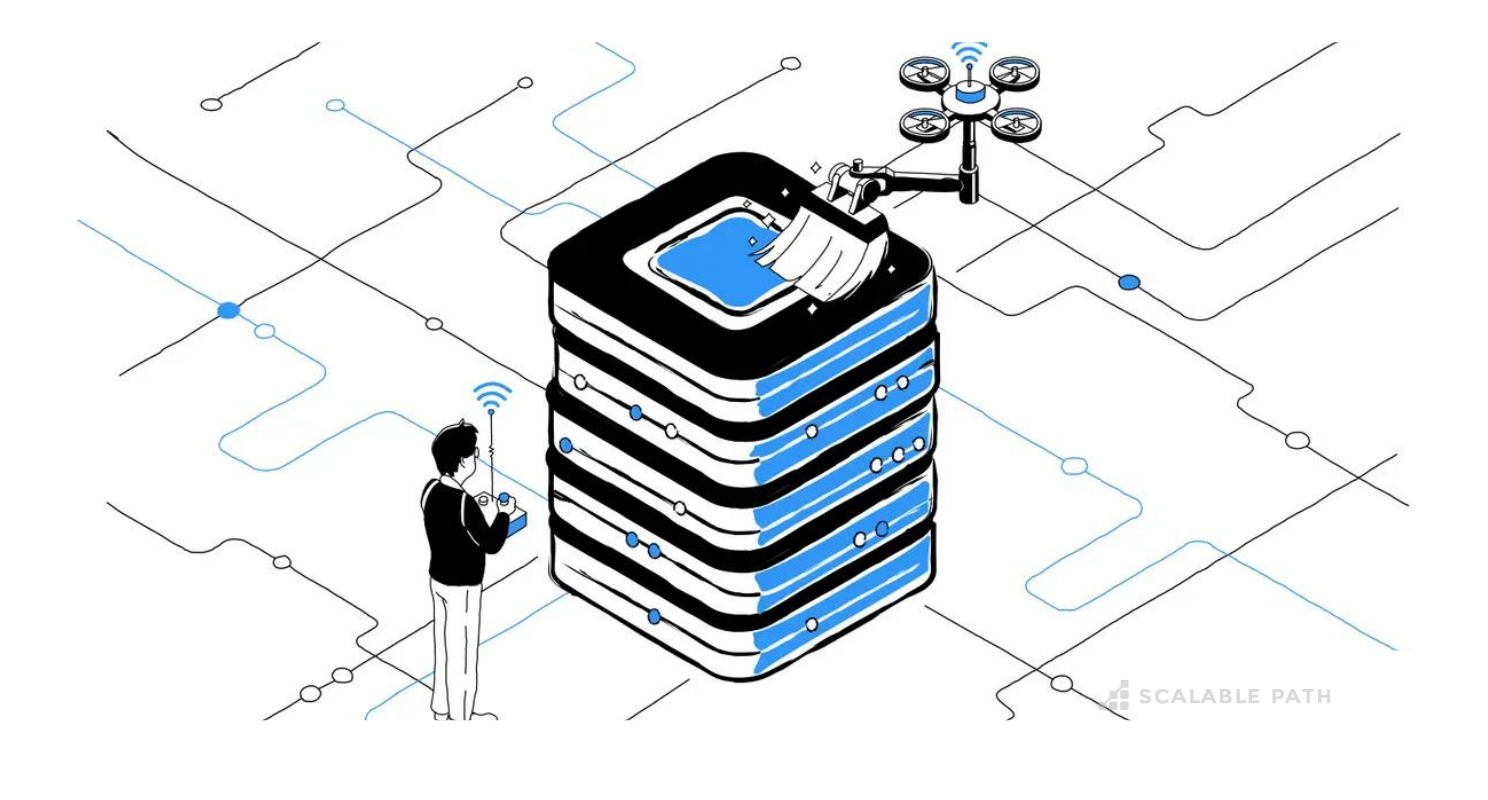

## 4. Data pre-processing

Let's import the dataset from part 1 

In [80]:
import pandas as pd 

In [81]:
bank_raw = pd.read_csv('Bank full data imported.csv')

In [84]:
bank_copy = bank_raw.copy()

In [85]:
bank_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 4.1 Checking missing values

- Checking missing values is important to ensure that the dataset is complete and free from missing or null values.
- This is because missing values can lead to biased or incorrect results in the regression analysis later on, and also beacause machine learning algorithms cannot handle missing data directly, leading to errors during training.
- Imputation or removal of missing values may be necessary to avoid model instability or poor performance.

In [86]:
# Check if there are any missing values in the entire DataFrame
any_missing = bank_copy.isnull().any().any()

# Display the result
print("Are there any missing values in the DataFrame?", any_missing)

Are there any missing values in the DataFrame? False


There is no missing value in the dataframe, hence there is no need to handle data in this regard. 

### 4.2 Dealing with "duration"

Previously, we have identified that there are numerous outliers in the "duration" variable, and that it could be potentially better to remove some outliers of this column in the data cleansing process.

In [87]:
bank_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Although removing certain datapoints without the domain knowledge on the nature of the dataset could lead to biased analysis, we could remove datapoints that have value above 1500 on "duration" for the simplicity of the analysis later on. 

In [88]:
bank_copy.drop(bank_copy[bank_copy.duration > 1500].index, inplace = True)

In [89]:
bank_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40982.000000,40982.000000,40982.000000,40982.000000,40982.000000,40982.000000,40982.000000,40982.000000,40982.000000,40982.000000
mean,40.024181,249.751159,2.569177,962.460934,0.173198,0.081877,93.575611,-40.502962,3.621004,5167.033686
std,10.422601,226.936086,2.774015,186.948059,0.495327,1.570898,0.578856,4.627130,1.734526,72.240980
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,1500.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- 206 observations have been removed, without drastically impacting the basic statistics of other numeric variables. 
- For "duration", the mean is around 249, minimum is 0, and the maximum is 1500. 

Although data cleansing can be conducted as above for "duration" before building the model, we have also discussed that 'duration' will not be useful in building a realistic predictive model as the duration seconds of the call cannot be known before the call is performed. Hence, we will remove the column "duration". 

In [102]:
bank_copy = bank_raw.copy()

In [103]:
bank_copy.drop('duration', axis=1, inplace=True)

In [104]:
print(bank_copy.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed deposit  
0          93

Hence, the column "duration" has been removed. 

### 4.3 Dealing with imbalanced data

As discussed in the EDA, the dataset was highly imbalanced in regards to the response variable. 

In [105]:
# Calculate counts and percentages of the class distribution
class_counts = bank_copy['deposit'].value_counts()
class_percentages = bank_copy['deposit'].value_counts(normalize=True) * 100
print(class_counts)
print(class_percentages)

deposit
no     36548
yes     4640
Name: count, dtype: int64
deposit
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


Only 4640 (11.27%) records show the successes of customers subscribing to deposit.

This is problematic since it could lead to severe reduction in accuracy of ML model we are attempting to build, as the highly unequal distribution in dependent variable of the training data makes the ML algorithm to become biased towards the majority class.
Hence, to tackle this unequal distribution, we could generate syenthetic data using SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is included in the python's imblanced-learn library, in which it uses k-nearest neighbors to create synthetic instances for the minority class, aiming to balance the class distribution. 

- As SMOTE can be only applied to numerical variables, we will have to convert the categorical variables into numeric. Considering the nominal nature of all the categorical variables in our dataset, we would prefer to apply one-hot encoding to all the categorical variables by creating dummy variables, and convert them to have numeric outcomes. 

- However, one-hot encoding will result in significant number of dummy variables. This clashes with the limitations of applying SMOTE, as SMOTE cannot be applied to a dataset with more than 15 variables. Hence, we will apply label encoding before SMOTE, and apply one-hot encoding afterwards. 

- The dataset will still contain more than 15 variables after label encoding, which prevents us from applying SMOTE. Therefore, we will drop the predictors that seemed not influential to the response variable in the EDA section. e.g. 'age', 'marital', 'education', 'job'. 

In [106]:
# Columns to drop
columns_to_drop = ['age', 'marital', 'education', 'job']

# Drop specified columns
bank_copy = bank_copy.drop(columns=columns_to_drop)

In [107]:
print(bank_copy.head())

   default housing loan    contact month day_of_week  campaign  pdays  \
0       no      no   no  telephone   may         mon         1    999   
1  unknown      no   no  telephone   may         mon         1    999   
2       no     yes   no  telephone   may         mon         1    999   
3       no      no   no  telephone   may         mon         1    999   
4       no      no  yes  telephone   may         mon         1    999   

   previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         0  nonexistent           1.1          93.994          -36.4   
1         0  nonexistent           1.1          93.994          -36.4   
2         0  nonexistent           1.1          93.994          -36.4   
3         0  nonexistent           1.1          93.994          -36.4   
4         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed deposit  
0      4.857       5191.0      no  
1      4.857       5191.0      no  
2      4.857  

Now the dataset has 15 predictors excluding the response variable, "deposit". 

We will then apply label encoding to convert the categotical variables to numeric.

In [108]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [109]:
# Extract features (X) and target variable (y)
X = bank_copy.drop(columns=['deposit'])
y = bank_copy['deposit']

# Identify categorical variables as SMOTE can only process numerical datatype
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

In [110]:
X

,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


We then apply SMOTE.

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # optimal ratio is 8:2

# Apply SMOTE to balance the class distribution
smote = SMOTE(sampling_strategy='auto', random_state=10) # 'auto' SMOTE will adjust the ratio automatically to achieve a balanced distribution.
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [112]:
X_resampled

,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,2,2,1,6,0,1,999,0,1,1.1,93.994,-36.4,4.857000,5191.0
1,0,2,0,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.855000,5191.0
2,0,2,0,0,6,4,2,999,1,0,-1.8,92.893,-46.2,1.281000,5099.1
3,0,2,0,0,0,1,6,999,0,1,-1.8,93.075,-47.1,1.405000,5099.1
4,0,2,0,0,3,1,2,999,0,1,1.4,93.918,-42.7,4.960000,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58471,0,1,0,0,1,1,1,8,1,2,-2.9,92.201,-31.4,0.824696,5076.2
58472,0,0,0,0,6,4,3,999,0,1,-1.8,92.893,-46.2,1.281000,5099.1
58473,0,2,0,0,8,2,3,999,0,1,-3.4,92.431,-26.9,0.751155,5017.5
58474,0,2,0,0,0,2,1,999,1,0,-1.8,93.075,-47.1,1.383781,5099.1


In [113]:
y_resampled

0         no
1         no
2        yes
3         no
4         no
        ... 
58471    yes
58472    yes
58473    yes
58474    yes
58475    yes
Name: deposit, Length: 58476, dtype: object

In [114]:
X_test

,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29773,0,0,0,1,0,1,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
14070,0,0,0,0,3,0,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1
39364,0,0,0,0,5,1,2,3,1,2,-1.8,93.369,-34.8,0.635,5008.7
29279,0,0,0,0,0,0,3,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
11888,0,0,0,1,4,0,16,999,0,1,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,0,2,0,0,0,0,3,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
37798,0,0,0,0,1,3,2,999,0,1,-2.9,92.201,-31.4,0.838,5076.2
25228,0,2,0,0,7,3,2,999,1,0,-0.1,93.200,-42.0,4.153,5195.8
23709,1,2,0,0,1,2,1,999,0,1,1.4,93.444,-36.1,4.962,5228.1


In [115]:
y_test

29773     no
14070     no
39364    yes
29279     no
11888     no
        ... 
29225    yes
37798    yes
25228     no
23709     no
18380     no
Name: deposit, Length: 8238, dtype: object

Now that we have generated the synthetic data using SMOTE, we combine the data again to apply one-hot encoding.

In [118]:
import pandas as pd

# Convert y_resampled and y_test to DataFrames 
y_resampled = pd.DataFrame(y_resampled, columns=['deposit'])
y_test = pd.DataFrame(y_test, columns=['deposit'])

# Combine X_resampled and X_test along with their corresponding labels
combined_X = pd.concat([X_resampled, X_test], axis=0)
combined_y = pd.concat([y_resampled, y_test], axis=0)

# Reset the index of the combined DataFrames
combined_X.reset_index(drop=True, inplace=True)
combined_y.reset_index(drop=True, inplace=True)
# Now, combined_X contains the features, and combined_y contains the target variable

combined_data = pd.concat([combined_X, combined_y], axis=1)
# Now, combined_data contains both features (combined_X) and the target variable (combined_y)


We will then apply one-hot encoding to comebined_data

In [120]:
import pandas as pd

data = combined_data

# List of categorical variables
cat_vars = ['default', 'housing' , 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Loop through each categorical variable
for var in cat_vars:
    # Create a new variable name for the one-hot encoding
    cat_list = 'var' + '_' + var
    
    # Perform one-hot encoding for the previous categorical variable (currently label encoded)
    cat_list = pd.get_dummies(data[var], prefix=var)
    
    # Convert boolean values to integers (True to 1, False to 0)
    cat_list = cat_list.astype(int)
    
    # Join the one-hot encoded columns to the original dataset
    data1 = data.join(cat_list)
    
    # Update the dataset with the new columns
    data = data1

# List of all variables in the dataset
data_vars = data.columns.values.tolist()

# Keep only non-categorical variables in the dataset
to_keep = [i for i in data_vars if i not in cat_vars]

# Print or use 'to_keep' for further analysis or modeling
print(to_keep)

['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit', 'default_0', 'default_1', 'default_2', 'housing_0', 'housing_1', 'housing_2', 'loan_0', 'loan_1', 'loan_2', 'contact_0', 'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'poutcome_0', 'poutcome_1', 'poutcome_2']


In [121]:
combined_data_final=data[to_keep]
print(combined_data_final.head())

   campaign  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         1    999         0           1.1          93.994          -36.4   
1         2    999         0           1.1          93.994          -36.4   
2         2    999         1          -1.8          92.893          -46.2   
3         6    999         0          -1.8          93.075          -47.1   
4         2    999         0           1.4          93.918          -42.7   

   euribor3m  nr.employed deposit  default_0  ...  month_8  month_9  \
0      4.857       5191.0      no          0  ...        0        0   
1      4.855       5191.0      no          1  ...        0        0   
2      1.281       5099.1     yes          1  ...        0        0   
3      1.405       5099.1      no          1  ...        0        0   
4      4.960       5228.1      no          1  ...        0        0   

   day_of_week_0  day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0              1              

Due to label encoding, the categorical variables have lost their string values. We will restore these string values for clearer interpretations. 

In [122]:
# Define a mapping dictionary for column renaming
column_mapping = {
    'default_0': 'default_no',
    'default_1': 'default_unknown',
    'default_2': 'default_yes',
    'housing_0': 'housing_no',
    'housing_1': 'housing_unknown',
    'housing_2': 'housing_yes',
    'loan_0': 'loan_no',
    'loan_1': 'loan_unknown',
    'loan_2': 'loan_yes',
    'contact_0': 'contact_cellular',
    'contact_1': 'contact_telephone',
    'month_0': 'month_apr',
    'month_1': 'month_aug',
    'month_2': 'month_dec',
    'month_3': 'month_jul',
    'month_4': 'month_jun',
    'month_5': 'month_mar',
    'month_6': 'month_may',
    'month_7': 'month_nov',
    'month_8': 'month_oct',
    'month_9': 'month_sep',
    'day_of_week_0': 'day_of_week_fri',
    'day_of_week_1': 'day_of_week_mon',
    'day_of_week_2': 'day_of_week_thu',
    'day_of_week_3': 'day_of_week_tue',
    'day_of_week_4': 'day_of_week_wed',
    'poutcome_0': 'poutcome_failure',
    'poutcome_1': 'poutcome_nonexistent',
    'poutcome_2': 'poutcome_success'
}

# Rename the columns in combined_data_final
combined_data_final = combined_data_final.rename(columns=column_mapping)

In [40]:
combined_data_final.columns.tolist()

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'deposit',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

### 4.4 Feature Scaling

Prior to dividing training and testing data, feature scaling will be conducted to refine the dataset. 

In [124]:
combined_data_final.describe()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_no,default_unknown,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,...,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000
mean,2.278038,896.139776,0.257637,-0.416802,93.493491,-40.209531,3.050551,5139.459159,0.855323,0.144632,...,0.034745,0.029334,0.198399,0.199074,0.219219,0.205429,0.177879,0.116677,0.788935,0.094388
std,2.390960,302.632109,0.594315,1.715473,0.628594,5.276288,1.885642,86.066196,0.351778,0.351732,...,0.183135,0.168743,0.398797,0.399307,0.413721,0.404018,0.382413,0.321038,0.408068,0.292370
min,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.252346,5076.200000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see above, comparing the mean values of the numeric predictors, our dataset contains predictors (features) that vary greatly in magnitude. This could mislead the ML algorithm to assume that the features with a large magnitude are more relevant than those with a small magnitude. As a result, when we train the model, those characteristics could become more important.To put all features into the same range, regardless of their relevance, feature scaling is required. 

- Feature scaling involves transforming the numerical features of dataset so that they are all on a similar scale, as it helps prevent certain features from dominating the others during the training process.

- Hence, we apply feature scaling only to the pre-existing numeric columns, excluding the categorical variables that have been one-hot encoded into boolean values. We use MinMax scaling to avoid some of the numeric variables having negative values when they shouldn't. 

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Identify numeric and boolean columns
numeric_columns = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean_columns = list(set(combined_data_final.columns) - set(numeric_columns))

# Apply standardization to numeric features
scaler = MinMaxScaler()
data_numeric_scaled = scaler.fit_transform(combined_data_final[numeric_columns])

# Combine the scaled numeric features with the boolean columns
data_scaled = pd.concat([pd.DataFrame(data_numeric_scaled, columns=numeric_columns), combined_data_final[boolean_columns]], axis=1)

In [126]:
data_scaled

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_nov,month_oct,...,contact_telephone,month_jun,deposit,housing_no,month_jul,day_of_week_tue,poutcome_failure,month_apr,poutcome_nonexistent,day_of_week_thu
0,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,...,1,0,no,0,0,0,0,0,1,0
1,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,0,0,...,1,0,no,0,0,0,0,0,1,1
2,0.018182,1.0,0.142857,0.333333,0.269680,0.192469,0.146679,0.512287,0,0,...,0,0,yes,0,0,0,1,0,0,0
3,0.090909,1.0,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0,0,...,0,0,no,0,0,0,0,1,1,0
4,0.018182,1.0,0.000000,1.000000,0.669135,0.338912,0.980730,1.000000,0,0,...,0,0,no,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66709,0.036364,1.0,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0,0,...,0,0,yes,0,0,0,0,1,1,0
66710,0.018182,1.0,0.000000,0.104167,0.000000,0.811715,0.046248,0.425709,0,0,...,0,0,yes,1,0,1,0,0,1,0
66711,0.018182,1.0,0.142857,0.687500,0.389322,0.368201,0.797778,0.877883,1,0,...,0,0,no,0,0,1,1,0,0,0
66712,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.981183,1.000000,0,0,...,0,0,no,0,0,0,0,0,1,1


Checking if there have been problems with scaling for any datapoints. 

In [127]:
nan_counts = data_scaled.isnull().sum()

# Print the number of NaN values in each column
print(nan_counts)

campaign                0
pdays                   0
previous                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
month_nov               0
month_oct               0
housing_yes             0
housing_unknown         0
month_aug               0
contact_cellular        0
default_yes             0
loan_yes                0
month_sep               0
day_of_week_fri         0
day_of_week_mon         0
loan_unknown            0
poutcome_success        0
month_mar               0
day_of_week_wed         0
default_unknown         0
month_dec               0
month_may               0
loan_no                 0
default_no              0
contact_telephone       0
month_jun               0
deposit                 0
housing_no              0
month_jul               0
day_of_week_tue         0
poutcome_failure        0
month_apr               0
poutcome_nonexistent    0
day_of_week_thu         0
dtype: int64

Every datapoints have been scaled without error.

In [128]:
data_scaled.describe()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_nov,month_oct,...,default_no,contact_telephone,month_jun,housing_no,month_jul,day_of_week_tue,poutcome_failure,month_apr,poutcome_nonexistent,day_of_week_thu
count,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,...,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000,66714.000000
mean,0.023237,0.897037,0.036805,0.621500,0.503699,0.443116,0.547846,0.664874,0.097026,0.034745,...,0.855323,0.270618,0.120934,0.446998,0.165288,0.205429,0.116677,0.081932,0.788935,0.219219
std,0.043472,0.302935,0.084902,0.357390,0.244970,0.220765,0.427486,0.325392,0.295996,0.183135,...,0.351778,0.444282,0.326053,0.497187,0.371443,0.404018,0.321038,0.274263,0.408068,0.413721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.333333,0.269680,0.338912,0.140183,0.425709,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.018182,1.000000,0.000000,0.687500,0.484412,0.376569,0.780322,0.859735,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980503,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As a result, the mean of every variable shares the same range between 0 and 1. 

### 4.5 Splitting training and testing data

Now that the dataset has been preprocessed, we can divide them into training and testing data. 

In [129]:
from sklearn.model_selection import train_test_split

# Extract features (X_bank_copy) and target variable (y_bank_copy)
X = data_scaled.drop(columns=['deposit'])
y = data_scaled['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # optimal ratio is 8:2

In [130]:
X_train

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_nov,month_oct,...,default_no,contact_telephone,month_jun,housing_no,month_jul,day_of_week_tue,poutcome_failure,month_apr,poutcome_nonexistent,day_of_week_thu
18984,0.018182,1.0,0.142857,0.479167,0.935308,0.054393,0.080027,0.000000,0,1,...,1,0,0,1,0,0,1,0,0,1
11711,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,...,0,1,0,1,0,0,0,0,1,0
13429,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.981864,1.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
43875,0.000000,1.0,0.000000,0.000000,0.174591,0.866109,0.018872,0.203781,1,0,...,1,0,0,1,0,1,0,0,1,0
46197,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.982090,1.000000,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17904,0.018182,1.0,0.000000,0.687500,0.389322,0.368201,0.780322,0.877883,1,0,...,1,0,0,0,0,0,0,0,1,1
37597,0.000000,1.0,0.000000,0.104167,0.000000,0.811715,0.055996,0.425709,0,0,...,1,0,0,0,0,0,0,0,1,0
10201,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980730,1.000000,0,0,...,1,0,0,0,1,0,0,0,1,0
9372,0.036364,1.0,0.000000,0.333333,0.269680,0.192469,0.143278,0.512287,0,0,...,1,0,0,0,0,0,0,0,1,1


In [131]:
y_train

18984     no
11711     no
13429     no
43875    yes
46197    yes
        ... 
17904     no
37597    yes
10201     no
9372      no
50496    yes
Name: deposit, Length: 53371, dtype: object

Now, we can combine X_train and y_train to make the final training data

In [132]:
# Convert y_train to a DataFrame if it is a Series
y_train = pd.DataFrame(y_train, columns=['deposit'])

# Combine X_train and y_train along with their corresponding labels
final_train_data = pd.concat([X_train, y_train], axis=1)

In [133]:
final_train_data

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_nov,month_oct,...,contact_telephone,month_jun,housing_no,month_jul,day_of_week_tue,poutcome_failure,month_apr,poutcome_nonexistent,day_of_week_thu,deposit
18984,0.018182,1.0,0.142857,0.479167,0.935308,0.054393,0.080027,0.000000,0,1,...,0,0,1,0,0,1,0,0,1,no
11711,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,...,1,0,1,0,0,0,0,1,0,no
13429,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.981864,1.000000,0,0,...,0,0,0,0,0,0,0,1,0,no
43875,0.000000,1.0,0.000000,0.000000,0.174591,0.866109,0.018872,0.203781,1,0,...,0,0,1,0,1,0,0,1,0,yes
46197,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.982090,1.000000,0,0,...,0,0,0,0,1,0,0,1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17904,0.018182,1.0,0.000000,0.687500,0.389322,0.368201,0.780322,0.877883,1,0,...,0,0,0,0,0,0,0,1,1,no
37597,0.000000,1.0,0.000000,0.104167,0.000000,0.811715,0.055996,0.425709,0,0,...,0,0,0,0,0,0,0,1,0,yes
10201,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980730,1.000000,0,0,...,0,0,0,1,0,0,0,1,0,no
9372,0.036364,1.0,0.000000,0.333333,0.269680,0.192469,0.143278,0.512287,0,0,...,0,0,0,0,0,0,0,1,1,no


In [134]:
# Calculate counts and percentages
class_counts2 = final_train_data['deposit'].value_counts()
class_percentages2 = final_train_data['deposit'].value_counts(normalize=True) * 100
print(class_counts2)
print(class_percentages2)

deposit
no     29290
yes    24081
Name: count, dtype: int64
deposit
no     54.879991
yes    45.120009
Name: proportion, dtype: float64


Hence, we have successfully tackled the imbalanced class distribution of the original dataset by creating a training data that contains 45.12% of positive records of clients subsribing to deposit. 
X_test and y_test will be used to test the performance of the classifier of our choice.



We can save the divided datasets into csv files to use them on a separate notebook for model development.

In [137]:
final_train_data.to_csv('final_train_data.csv', index=False)

In [141]:
X_train.to_csv('X_train_data.csv', index=False)

In [142]:
y_train.to_csv('y_train_data.csv', index=False)

In [139]:
X_test.to_csv('X_test_data.csv', index=False)

In [140]:
y_test.to_csv('y_test_data.csv', index=False)